In [1]:
import pandas as pd
a=pd.read_table("/home/jash/Desktop/petplan/Profitability1.txt", sep='|', lineterminator='\n', error_bad_lines=False)

Skipping line 267909: expected 33 fields, saw 34

Skipping line 299539: expected 33 fields, saw 34

/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data=pd.DataFrame(data=a,index=None)
data = data.sample(frac=1).reset_index(drop=True)
import math
import numpy as np
data['LossRatio'].fillna(0, inplace=True)
data['L']=0
data.loc[data['LossRatio'] >8.451531 ,'L'] = 1

data.to_csv("/home/jash/Desktop/petplan/Profitability.csv")
Y=data['L']
y=pd.DataFrame(Y)
x=pd.DataFrame(data)

m=x.loc[x['PolicyForm']!='Introductory']
q=pd.DataFrame(m)
m2=q.loc[q['PolicyForm']!='Intro']
m3=pd.DataFrame(m2)
m4=m3.loc[m3['Quadrant']=='LowTenure-HighLR']
x=pd.DataFrame(m4)

print x.head()

     LossRatio  Duration             PetId   StartDate     EndDate  \
78    1.704444       341    US1388402Ziggy  2017-08-21  2018-08-20   
79    2.618923       184      US163023Rafi  2015-03-07  2015-09-06   
143  19.833682       313  CAN303511Abigail  2017-09-18  2018-10-08   
176   4.813859       216   US2100721HARLEY  2017-09-27  2018-04-30   
185  13.263593       227    US55749Georgie  2016-06-22  2017-02-03   

                        LastPolicyRef  TotalClaimsAmtPaid  TotalEarnedPremium  \
78                             506763             417.217          244.781945   
79   685BF2DA64E84E3586F56EE779F8169F             642.970          245.509290   
143                            120204            3943.888          198.848000   
176                            526065            1553.879          322.792767   
185                            258476            5398.552          407.020329   

                          BreedName  Currentage ...   Surname  GivenName  \
78   Mixed Breed

In [3]:

x.isnull().sum()

LossRatio                           0
Duration                            0
PetId                               0
StartDate                           0
EndDate                             0
LastPolicyRef                       0
TotalClaimsAmtPaid                  0
TotalEarnedPremium                  0
BreedName                           0
Currentage                          0
CopayPct                            0
Deductible                          0
PetType                             0
PolicyForm                          0
CarrierCd                           0
ClaimNumber                         0
ClaimAmount                         0
ClaimDetails                        0
ConditionGrp                        0
Claimcodecategory                   0
Severity                           46
CustomerNumber                     61
Country                            61
PhoneNumber                        92
Surname                            63
GivenName                          67
CustomerMail

In [4]:
x.drop(['LossRatio'],axis=1,inplace=True)
x.drop(['CustomerNumber','PhoneNumber','Surname','GivenName','CustomerMailingAddr_Addr1','CustomerMailingAddr_City','CustomerMailingAddr_StateProvCd',
       'CustomerMailingAddr_PostalCode','PetId','StartDate','EndDate','LastPolicyRef'],axis=1,inplace=True)



In [5]:
p=pd.DataFrame(x)

In [6]:
p.drop(['ClaimNumber','ClaimAmount','Severity','ClaimDetails','ConditionGrp','Claimcodecategory','claimdurationInception'],axis=1,inplace=True)

In [7]:
p.isnull().sum()

Duration               0
TotalClaimsAmtPaid     0
TotalEarnedPremium     0
BreedName              0
Currentage             0
CopayPct               0
Deductible             0
PetType                0
PolicyForm             0
CarrierCd              0
Country               61
Quadrant               0
churn\r                0
L                      0
dtype: int64

In [8]:


p['TotalClaimsAmtPaid'].fillna(0, inplace=True)

In [9]:
p.isnull().sum()

Duration               0
TotalClaimsAmtPaid     0
TotalEarnedPremium     0
BreedName              0
Currentage             0
CopayPct               0
Deductible             0
PetType                0
PolicyForm             0
CarrierCd              0
Country               61
Quadrant               0
churn\r                0
L                      0
dtype: int64

In [10]:
p.dropna(how='any',inplace=True)

In [11]:
p.isnull().sum()

Duration              0
TotalClaimsAmtPaid    0
TotalEarnedPremium    0
BreedName             0
Currentage            0
CopayPct              0
Deductible            0
PetType               0
PolicyForm            0
CarrierCd             0
Country               0
Quadrant              0
churn\r               0
L                     0
dtype: int64

In [12]:
p.drop(['Quadrant','TotalClaimsAmtPaid','TotalEarnedPremium'],axis=1,inplace=True)

In [13]:
print p.shape

(16100, 11)


In [14]:

import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()
df = h2o.H2OFrame(p)
y = 'L'
x=df.col_names
print df
x.remove(y)
df[y] = df[y].asfactor()
train, valid, test = df.split_frame(ratios=[.8,.1])
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm_cv3 = H2OGradientBoostingEstimator(nfolds=3)
gbm_cv3.train(x=x, y=y, training_frame=train)
## Getting all cross validated models 
all_models = gbm_cv3.cross_validation_models()
print("Total cross validation models: " + str(len(all_models)))

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,8 mins 53 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,4 months and 28 days !!!
H2O cluster name:,H2O_from_python_jash_sdf687
H2O cluster total nodes:,1
H2O cluster free memory:,1.653 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/h2o.py:562: UserWarning: [Lwater.parser.ParseWriter$ParseErr;@28216a9b
  warnings.warn(w)


Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_807e712072e41a26f3d34eef414b4220 at line 0 ( destination line 0 )  at byte offset 111; error = 'Unmatched quote char "'
  warnings.warn(w)
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_807e712072e41a26f3d34eef414b4220 at line 2 ( destination line 2 )  at byte offset 117; error = 'Unmatched quote char "'
  warnings.warn(w)


Duration,BreedName,Currentage,CopayPct,Deductible,PetType,PolicyForm,CarrierCd,Country,churn,L
nan,BreedName,nan,nan,nan,PetType,nan,CarrierCd,Country,nan,nan
nan,,nan,nan,nan,,nan,,,nan,nan
341,Mixed Breed Medium (23 - 70lb),2,0.7,500,Dog,15000,XLC,US,0,0
184,Smooth Fox Terrier,0,0,100,PPDOG001,nan,ALZ,US,1,0
313,Domestic Shorthair,1,0.8,250,Cat,15000,CAN,CAN,0,1
216,Mixed Breed Large (71lb +),0,0.9,250,Dog,nan,XLC,US,1,0
227,Golden Retriever,1,0.8,200,Dog,10000,XLC,US,1,1
272,Mixed Breed Small ( up to 22lb ),3,0.9,250,Dog,15000,CAN,CAN,0,0
292,Domestic Shorthair,0,0.9,250,Cat,20000,XLC,US,0,0
232,Cavachon,0,0.8,250,Dog,nan,XLC,US,0,0



gbm Model Build progress: |███████████████████████████████████████████████| 100%
Total cross validation models: 3


In [15]:
gbm_cv3.confusion_matrix()
performance = gbm_cv3.model_performance(test_data=test)
print performance



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.115148602139
RMSE: 0.339335530322
LogLoss: 0.367010126328
Mean Per-Class Error: 0.20001145213
AUC: 0.889947892808
Gini: 0.779895785616
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31990808846: 


,0,1,Error,Rate
0,1041.0,139.0,0.1178,(139.0/1180.0)
1,126.0,318.0,0.2838,(126.0/444.0)
Total,1167.0,457.0,0.1632,(265.0/1624.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3199081,0.7058824,179.0
max f2,0.1838842,0.7766806,269.0
max f0point5,0.5259715,0.7670455,99.0
max accuracy,0.4259342,0.8546798,134.0
max precision,0.9441076,1.0,0.0
max recall,0.0442365,1.0,366.0
max specificity,0.9441076,1.0,0.0
max absolute_mcc,0.4259342,0.6136583,134.0
max min_per_class_accuracy,0.2593701,0.7905405,214.0
max mean_per_class_accuracy,0.2858444,0.7999885,197.0


Gains/Lift Table: Avg response rate: 27.34 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0110837,0.9120020,3.6576577,3.6576577,1.0,1.0,0.0405405,0.0405405,265.7657658,265.7657658
,2,0.0215517,0.8950943,3.4425013,3.5531532,0.9411765,0.9714286,0.0360360,0.0765766,244.2501325,255.3153153
,3,0.0301724,0.8804507,3.6576577,3.5830116,1.0,0.9795918,0.0315315,0.1081081,265.7657658,258.3011583
,4,0.0406404,0.8404477,3.6576577,3.6022386,1.0,0.9848485,0.0382883,0.1463964,265.7657658,260.2238602
,5,0.0511084,0.8152560,3.6576577,3.6135895,1.0,0.9879518,0.0382883,0.1846847,265.7657658,261.3589493
,6,0.1003695,0.6278796,3.2004505,3.4108219,0.875,0.9325153,0.1576577,0.3423423,220.0450450,241.0821865
,7,0.1502463,0.5193119,2.8900011,3.2379265,0.7901235,0.8852459,0.1441441,0.4864865,189.0001112,223.7926451
,8,0.2001232,0.4267359,2.2126571,2.9823978,0.6049383,0.8153846,0.1103604,0.5968468,121.2657102,198.2397782
,9,0.2998768,0.2993758,1.3095318,2.4259208,0.3580247,0.6632444,0.1306306,0.7274775,30.9531754,142.5920787
,10,0.4002463,0.2408042,0.8751451,2.0370340,0.2392638,0.5569231,0.0878378,0.8153153,-12.4854916,103.7033957


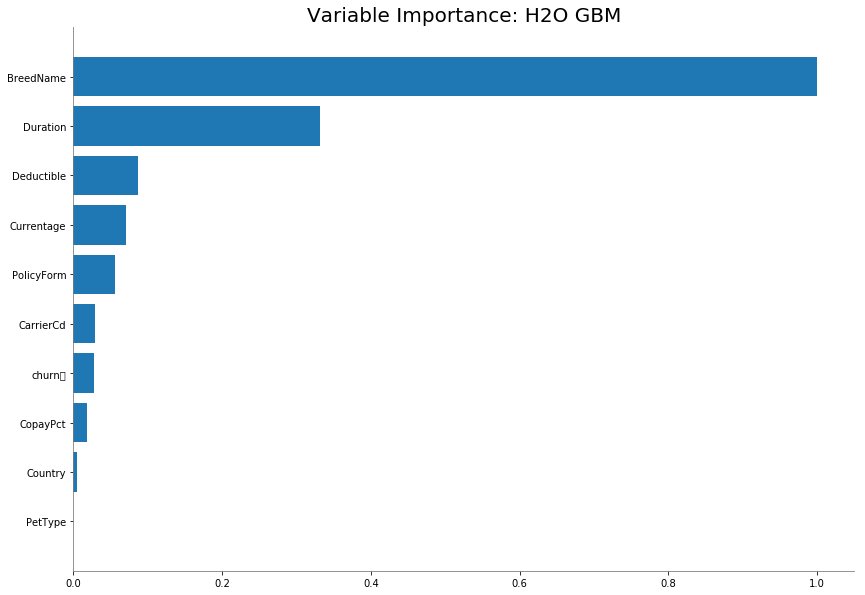

[(u'BreedName', 3827.307861328125, 1.0, 0.6150190352981418),
 (u'Duration', 1269.1837158203125, 0.3316126535428194, 0.2039480942745617),
 (u'Deductible', 331.3560791015625, 0.08657680309693658, 0.05324638191987511),
 (u'Currentage', 270.6240234375, 0.07070871569333072, 0.043487206112882835),
 (u'PolicyForm', 213.28489685058594, 0.05572713368727368, 0.03427324800027764),
 (u'CarrierCd', 111.78716278076172, 0.029207779157323952, 0.01796334016053855),
 (u'churn\r', 107.2201156616211, 0.028014499890378387, 0.017229450696940415),
 (u'CopayPct', 70.84481811523438, 0.018510352624377155, 0.011384219214072866),
 (u'Country', 20.73764419555664, 0.005418337104546487, 0.0033323804589583074),
 (u'PetType',
  0.7258831858634949,
  0.00018965894883919896,
  0.00011664386375074378)]

In [17]:
import matplotlib.pyplot as plt
gbm_cv3.varimp_plot()
gbm_cv3.varimp()

In [18]:
import subprocess
from IPython.display import Image

In [20]:
mojo_file_name = "/home/jash/Desktop/petplan/treeslthlr/my_gbm_mojo.zip"
h2o_jar_path= '/home/jash/Desktop/petplan/trees/h2o-3.20.0.4/h2o.jar'
mojo_full_path = mojo_file_name
gv_file_path = "/home/jash/Desktop/petplan/treeslthlr/my_gbm_graph.gv"

In [31]:
image_file_name = "/home/jash/Desktop/petplan/treeslthlr/my_gbm_tree"

In [32]:
gbm_cv3.download_mojo(mojo_file_name)

'/home/jash/Desktop/petplan/treeslthlr/my_gbm_mojo.zip'

In [33]:

def generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, tree_id = 0):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), "-i", mojo_full_path , "-o", gv_file_path ], shell=False)
    result = subprocess.call(["ls",gv_file_path], shell = False)
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else: 
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")

In [34]:
def generateTreeImage(gv_file_path, image_file_path, tree_id):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")

In [45]:

generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_name, 3)

Success: Graphviz file /home/jash/Desktop/petplan/treeslthlr/my_gbm_graph.gv is generated.


In [46]:
generateTreeImage(gv_file_path, image_file_name, 3)

Success: Image File /home/jash/Desktop/petplan/treeslthlr/my_gbm_tree_3.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='/home/jash/Desktop/petplan/treeslthlr/my_gbm_tree_3.png')


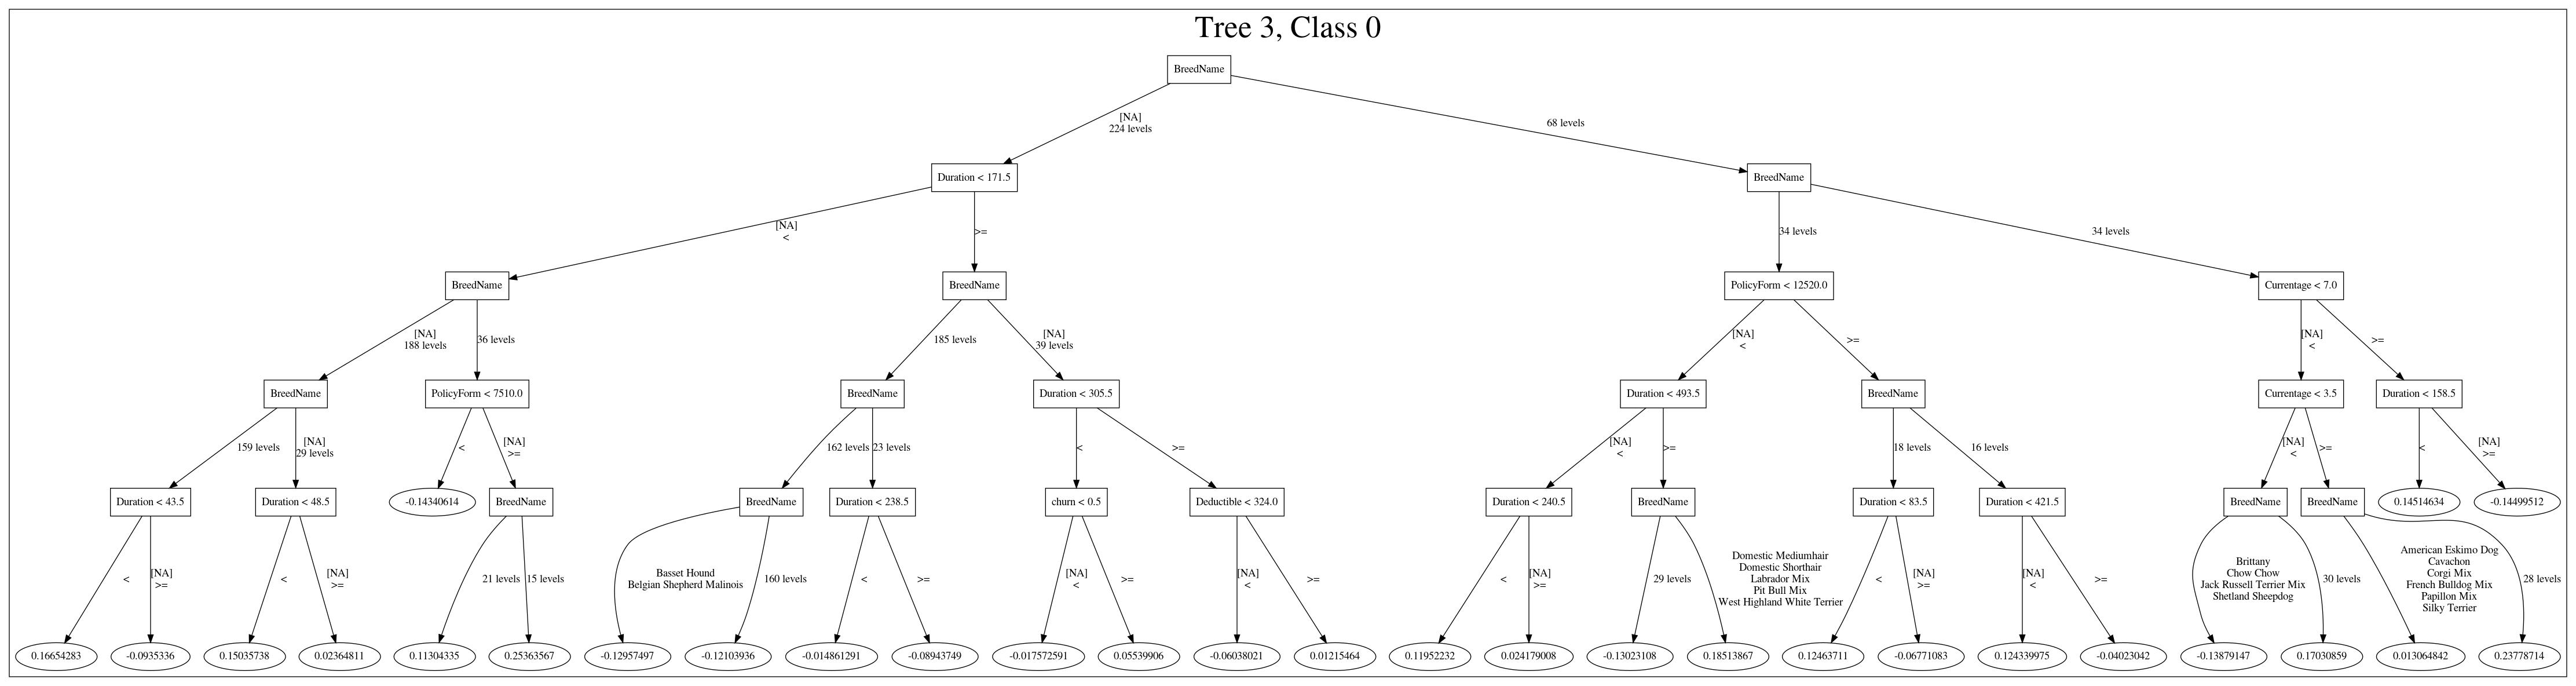

In [47]:
Image(filename='/home/jash/Desktop/petplan/treeslthlr/my_gbm_tree_3.png')